<a href="https://colab.research.google.com/github/Nishantarya80/SBI-mutual-fund-prediction/blob/main/SBI_mutual_fund_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install Quandl

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
import quandl
quandl.ApiConfig.api_key = 'drWdhH-GUWtyi5tCLdbP'
dataset = quandl.Dataset('BSE/BOM535276').data()

In [ ]:
data=dataset.to_pandas().reset_index()

In [ ]:
data

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Year,Month,NewDate
0,2013-03-28,194.28,194.28,182.18,191.39,191.903226,465.0,11.0,89235.0,440.0,94.62,12.10,-2.89,2013,3,28
1,2013-04-01,193.50,193.50,193.50,193.50,193.500000,212.0,2.0,41022.0,212.0,100.00,0.00,0.00,2013,4,1
2,2013-04-04,191.45,191.45,191.45,191.45,191.442308,52.0,3.0,9955.0,52.0,100.00,0.00,0.00,2013,4,4
3,2013-04-05,189.75,189.75,189.45,189.45,189.615385,26.0,2.0,4930.0,26.0,100.00,0.30,-0.30,2013,4,5
4,2013-04-08,189.35,189.35,189.35,189.35,189.346154,26.0,1.0,4923.0,26.0,100.00,0.00,0.00,2013,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,2019-10-23,416.00,416.00,411.79,415.27,415.130000,7676.0,53.0,3186549.0,6998.0,91.17,4.21,-0.73,2019,10,23
1476,2019-10-24,417.00,420.00,407.06,414.62,414.320000,1406.0,49.0,582531.0,975.0,69.35,12.94,-2.38,2019,10,24
1477,2019-10-25,416.00,416.00,412.00,414.87,413.990000,1992.0,47.0,824665.0,1991.0,99.95,4.00,-1.13,2019,10,25
1478,2019-10-27,414.00,421.00,405.10,416.06,416.690000,1145.0,51.0,477106.0,1117.0,97.55,15.90,2.06,2019,10,27


In [ ]:
l=[[x.to_pydatetime().year for x in data.Date],[x.to_pydatetime().month for x in data.Date],[x.to_pydatetime().day for x in data.Date]]

In [ ]:
l=np.array(l).transpose()

In [ ]:
df2=pd.DataFrame(l,columns=['Year','Month','NewDate'])

In [ ]:
data=pd.concat([data,df2],axis=1)

In [ ]:
data.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Year,Month,NewDate
0,2013-03-28,194.28,194.28,182.18,191.39,191.903226,465.0,11.0,89235.0,440.0,94.62,12.1,-2.89,2013,3,28
1,2013-04-01,193.50,193.50,193.50,193.50,193.500000,212.0,2.0,41022.0,212.0,100.00,0.0,0.00,2013,4,1
2,2013-04-04,191.45,191.45,191.45,191.45,191.442308,52.0,3.0,9955.0,52.0,100.00,0.0,0.00,2013,4,4
3,2013-04-05,189.75,189.75,189.45,189.45,189.615385,26.0,2.0,4930.0,26.0,100.00,0.3,-0.30,2013,4,5
4,2013-04-08,189.35,189.35,189.35,189.35,189.346154,26.0,1.0,4923.0,26.0,100.00,0.0,0.00,2013,4,8


In [ ]:
X =data[["Open","High","Low","Year","Month","NewDate"]]
y =data['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

## Linear Regression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Accuracy', model.score(X_test,y_test))

Accuracy 0.9937469138183669


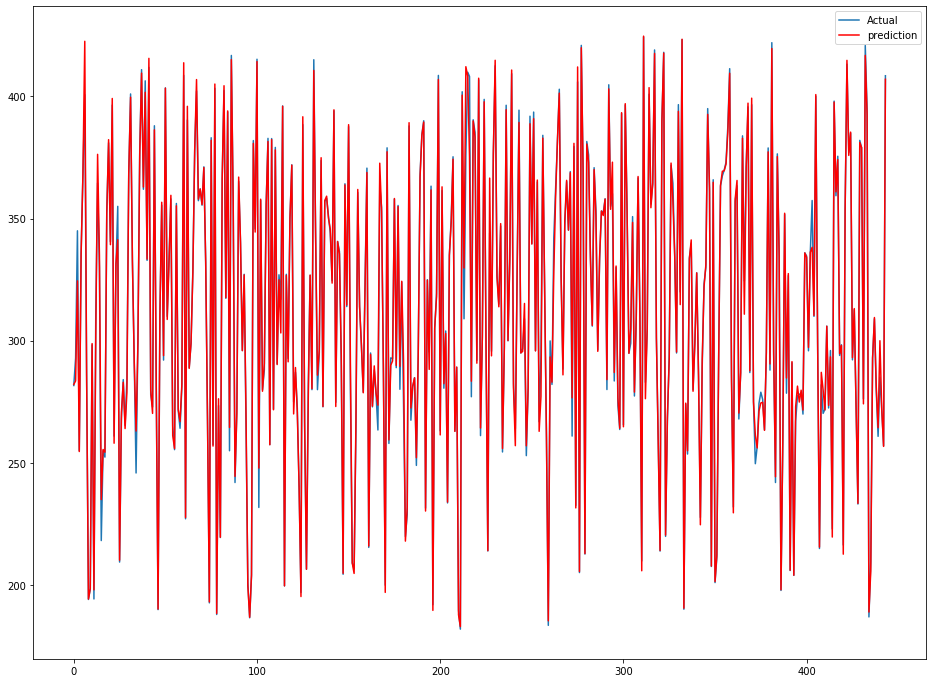

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(y_test,label='Actual')
plt.plot(model.predict(X_test),color='red',label='prediction')
plt.legend()

In [ ]:
model.predict([[415.00,421.00,405.20,2019,5,11]])

array([411.95463263])

In [ ]:
model.predict([[409.97,410.13,406.72,2019,5,10]])

array([407.58517886])

##Support Vector Regression

In [ ]:
svrmodel=SVR()
svrmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svrmodel.score(X_test,y_test)

-0.049483808566198384

In [ ]:
#linear svr
from sklearn.svm import LinearSVR
svrlinearmodel=LinearSVR()

In [ ]:
svrlinearmodel.fit(X_train,y_train)
print('Accuracy',svrlinearmodel.score(X_test,y_test))

Accuracy 0.9650234287580199


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


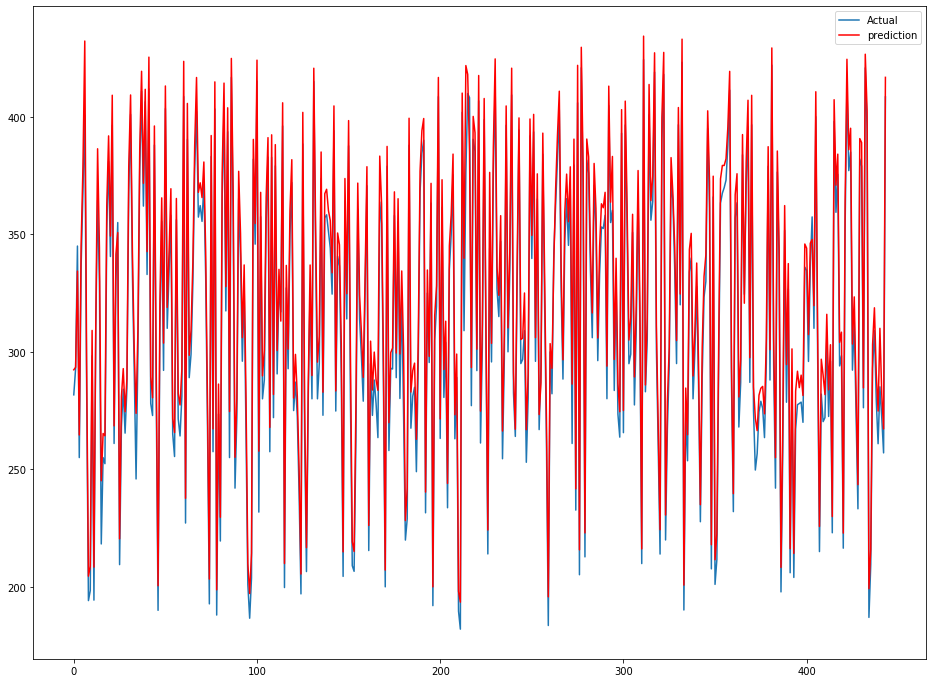

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(y_test,label='Actual')
plt.plot(svrlinearmodel.predict(X_test),color='red',label='prediction')
plt.legend()

In [ ]:
## Polynomial Regression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly_train = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)


In [ ]:
nmodel=LinearRegression()
nmodel.fit(x_poly_train,y_train)
print('Accuracy',nmodel.score(x_poly_test,y_test))

Accuracy 0.9946695320273508


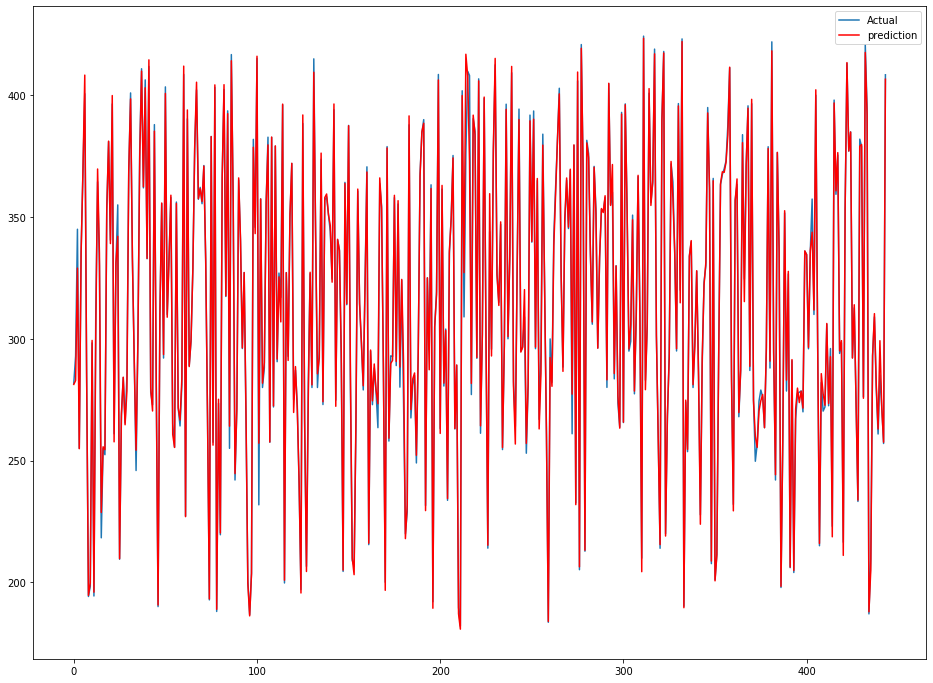

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(y_test,label='Actual')
plt.plot(nmodel.predict(x_poly_test),color='red',label='prediction')
plt.legend()

In [ ]:
nmodel.predict(polynomial_features.fit_transform([[414.00,421.00,413.00,2019,10,29]]))

array([417.61432926])